In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv("vehicles.csv")

print(df.shape)
print(df.columns)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'vehicles.csv'

In [7]:
df.nunique (axis = 0)

Unnamed: 0      458213
id              458213
url             458213
region             405
region_url         413
price            16924
year               110
manufacturer        43
model            31520
condition            6
cylinders            8
fuel                 5
odometer        108135
title_status         6
transmission         3
VIN             133620
drive                3
size                 4
type                13
paint_color         12
image_url       285404
description     384347
state               51
lat              61179
long             61559
posting_date    423805
dtype: int64

In [8]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,458213.000000,458213.000000,457163.000000,402910.000000,450765.000000,450765.000000
mean,229106.000000,7235233427.477093,40420.930696,2010.746067,101669.756941,38.531925,-94.375824
std,132274.843786,4594362.049928,8194598.603665,8.868136,3228622.544962,5.857378,18.076225
min,0.000000,7208549803.000000,0.000000,1900.000000,0.000000,-82.607549,-164.091797
25%,114553.000000,7231952523.000000,4900.000000,2008.000000,40877.000000,34.600000,-110.890427
50%,229106.000000,7236408504.000000,10995.000000,2013.000000,87641.000000,39.244500,-88.314889
75%,343659.000000,7239320847.000000,21495.000000,2016.000000,134000.000000,42.484503,-81.015022
max,458212.000000,7241019367.000000,3615215112.000000,2021.000000,2043755555.000000,82.049255,150.898969


In [9]:
NA_val = df.isna().sum()
def na_filter(na, threshold = .4):
    col_pass = []
    for i in na.keys():
        if na[i]/df.shape[0]<threshold:
            col_pass.append(i)
    return col_pass
df_cleaned = df[na_filter(NA_val)]
df_cleaned.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

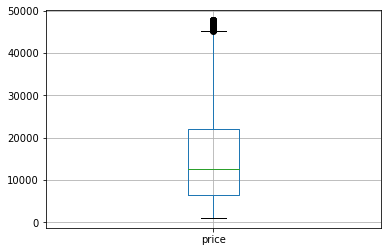

In [10]:
df_cleaned = df_cleaned[df_cleaned['price'].between(999.99, 250000)]
Q1 = df_cleaned['price'].quantile(0.25)
Q3 = df_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1

df_filtered = df_cleaned.query('(@Q1 - 1.5 * @IQR) <= price <= (@Q3 + 1.5 * @IQR)')
df_filtered.boxplot('price')

In [11]:
df_filtered.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Unnamed: 0,id,price,year,odometer,lat,long
count,397924.000000,397924.000000,397924.000000,397183.000000,353572.000000,395121.000000,395121.000000
mean,228141.116417,7235240279.642457,15243.360119,2010.372677,106050.027610,38.538368,-93.882636
std,132017.990582,4593721.836604,10896.111593,8.837452,3446223.125003,5.852939,17.740923
min,0.000000,7208549803.000000,1000.000000,1900.000000,0.000000,-82.607549,-164.091797
25%,114054.750000,7231961865.250000,6470.000000,2007.000000,44268.750000,34.733208,-106.574900
50%,225672.500000,7236421591.000000,12500.000000,2012.000000,92200.000000,39.329119,-87.970194
75%,343424.250000,7239328509.750000,21990.000000,2016.000000,138000.000000,42.449121,-80.908400
max,458212.000000,7241019367.000000,47744.000000,2021.000000,2043755555.000000,82.049255,150.898969


In [12]:
df_filtered = df_filtered[df_filtered['year'].between(1900, 2021)]
df_filtered = df_filtered[df_filtered['odometer'].between(0, 300000)]

In [13]:
df_final = df_filtered.copy().drop(['id','url','region_url','image_url','region','description','model','state','paint_color'], axis=1)
df_final.shape

(350744, 14)

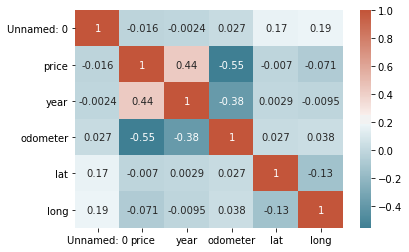

In [14]:
import matplotlib.pylab as plt
import seaborn as sns

corr = df_final.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
           annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [1]:
df_final = pd.get_dummies(df_final, drop_first=True)
print(df_final.columns)

NameError: name 'pd' is not defined

In [ ]:
from sklearn.preprocessing import StandardScalar
X_head = df_final.iloc[:, df_final.columns != 'price']

X = df_final.loc[:, df_final.columns != 'price']
y = df_final['price']
X = StandardScalar().fit_transform(X)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForrestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predit(X_test)

In [ ]:
print(mae(y_test, pred))
print(df_final['price'].mean())model.score(X_test, y_test)